# Apresentação do projeto:
---
## **Statudo de agrupamento K-means(Centroides) para identificar a grupo de clientes**

**Base de dados:** Foi utilizado a API da repositório UCI, um repositório dedicado a estudo de Machine Leraning (Aprendizado de máquina).

Objeto de Pesquisa: Identificar a relação de consumo de energia por grupo de clientes localizados em Sceux (7km de Paris, França)


# Primeiros passos



1.  Instalar API de acesso ao UCI
2.  Importar e identificar API
3.  Acessar os dados e armazenar em um DataFrame


In [1]:
pip install ucimlrepo

In [153]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
individual_household_electric_power_consumption = fetch_ucirepo(id=235)

# data (as pandas dataframes)
X = individual_household_electric_power_consumption.data.features
y = individual_household_electric_power_consumption.data.targets

# metadata
print(individual_household_electric_power_consumption.metadata)

# variable information
print(individual_household_electric_power_consumption.variables)


{'uci_id': 235, 'name': 'Individual Household Electric Power Consumption', 'repository_url': 'https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption', 'data_url': 'https://archive.ics.uci.edu/static/public/235/data.csv', 'abstract': 'Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.', 'area': 'Physics and Chemistry', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 2075259, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2006, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C58K54', 'creators': ['Georges Hebrail', 'Alice Berard'], 'intro_paper': None, 'additional_info': {'summary': 'This archiv

In [154]:
import pandas as pd

In [155]:
# alteramos o parametro da leitura do arquivo CSV para que o arquivo seja lido de forma inteira.
# A função low_memory faz com que os dados venha na sua forma bruta, sem que o dado seja pré definido pelo algorítmo de importação
# A depender do tamanho do arquivo, o consumo de memória da máquina vitual irá exigir muito recurso somente para identificar os dados
dataset = pd.read_csv("https://archive.ics.uci.edu/static/public/235/data.csv", delimiter=',',low_memory=False)

In [5]:
dataset.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


# Identificado e Analisando os dados (Análise Exploratória)
1.   Importar Bibliotecas[texto do link](https://)
2.   Renomar colunas
3.   tratar dados vazios (Na)



In [6]:
#Bibliotecas

#Bibliotecas utilizadas para análise exploratório
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab

#Biblioteca utilizada para machine learning
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist

# Biblioteca responsável para avaliar o algorítmo de clusterização
# muito utilizado para análise de algorítmos de aprendizagem não supervisionado
from sklearn.metrics import silhouette_score


#Remover avisos na tela de execução
import warnings
warnings.filterwarnings("ignore")

# Definir a exibição do grafico em tela
%matplotlib inline

In [156]:
df = dataset.rename(columns = {'Date' : 'Date',
                               'Time':'Tempo',
                               'Global_active_power':'Potencia_Ativa_Global',
                               'Global_reactive_power':'Potência_Reativa_Global',
                               'Voltage':'Tensao_Voltagem',
                               'Global_intensity':'Intensidade_Global',
                               'Sub_metering_1':'SubMedicao_1',
                               'Sub_metering_2':'SubMedicao_2',
                               'Sub_metering_3':'SubMedicao_3'
                               })

In [157]:
df.head()

,Date,Tempo,Potencia_Ativa_Global,Potência_Reativa_Global,Tensao_Voltagem,Intensidade_Global,SubMedicao_1,SubMedicao_2,SubMedicao_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [158]:
# Verificado o tamanho do data set
# podemos observar que no resumo irá retornar um total de 2.075.259 registros dividios em 9 colunas
df.shape

(2075259, 9)

In [159]:
# Vamos identificar o tipo das colunas e ver se há necessidade de alterar o tipo da coluna
# Dependendo do tipo de dado detinido pela coluna o algorítimo de Machine Learning não consegue processar o dado
# devido a função low_memory=False utilizado na importação, todos as colunas vieram definidas como Object, com exceção do ultimo dado que é um float (dado numérico com casa decimal)
df.dtypes

Date                        object
Tempo                       object
Potencia_Ativa_Global       object
Potência_Reativa_Global     object
Tensao_Voltagem             object
Intensidade_Global          object
SubMedicao_1                object
SubMedicao_2                object
SubMedicao_3               float64
dtype: object

In [160]:
# Uma versão mais completa do código acima, trazendo um pequeno resumo do DataSet
# Numero de colunas, numero de linhas, quantidade e tipo de dados e o tamanho do arquivo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Date                     object 
 1   Tempo                    object 
 2   Potencia_Ativa_Global    object 
 3   Potência_Reativa_Global  object 
 4   Tensao_Voltagem          object 
 5   Intensidade_Global       object 
 6   SubMedicao_1             object 
 7   SubMedicao_2             object 
 8   SubMedicao_3             float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [161]:
#Vamos verificar se o arquivo possui QUALQUER dados em nulo
# como o retorno do boolean foi verdadeiro, há dados nulos em nosso dataframe
df.isnull().values.any()

True

In [162]:
# Identificaremos a quantidade de dados nulos em cada coluna
# O resultado do código retornou um total de 25.979 dados em banco na coluna SubMedicao_3
df.isnull().sum()

Date                           0
Tempo                          0
Potencia_Ativa_Global          0
Potência_Reativa_Global        0
Tensao_Voltagem                0
Intensidade_Global             0
SubMedicao_1                   0
SubMedicao_2                   0
SubMedicao_3               25979
dtype: int64

# Fase de Pré-processamento dos dados

1.   tratar dados vazios (Na)
2.   Separar os dados úteis para o estudo
3.   Seprara dados de amostra


In [14]:
# Há diversas forma de trar os arquivos nulos, devido a quantidade de linhas com dados nulos representarem
# aproximadamente 1% de uma massa de dados com mais de 2milhoes de registros
# foi optado por remover os dados, uma vez que não iram interferir no aprendizado da máquina
(25979/2075259)*100


1.2518437457686005

In [163]:
# removendo os arquivos nulos com a função dropna
# Também vamos aproveitar para redimencionar os dados dados, removendo as colunas que não iremos utilizar nesse estudo
# Será excluído as funções Date e Tempo, uma vez que não iremos mexer com Regreção Linear ou LSTM que é uma arquitetura de rede neural recorrente (RNN)
# Usamos a função iloc para pegar os arquivos de primeira linha até a última [0:]
# da segunda linha até a ultima[2:], uma vez que não desejamos utilizar somente as duas primeiras
# Também poderia ser removido utilizando a função Drop do pandas como comando "df.drop(columns=['Date','Tempo'])""

df = df.iloc[0:,
             2:9].dropna()

In [164]:
df.head()

,Potencia_Ativa_Global,Potência_Reativa_Global,Tensao_Voltagem,Intensidade_Global,SubMedicao_1,SubMedicao_2,SubMedicao_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [165]:
# Verificamos que realmente foi removido os arquivos nulos de nossa DataFrame
df.isnull().values.any()

False

In [166]:
# vamos agora dividir nosso data frame em valores de entrada e saída
# Como utilizaremos aprendizado de máquina NÃO SUPERVISIONADO
# utilizaremos somente dados de entrada, uma vez que não possuímos dados de saída (Tagert) para compração
# será criado o nosso Target que são os nossos agrupamentos (Clusters)
# utilizaremos o df.values para pegar os valores do DataFrame e armazenarem em formato de array
# dataset_atrib = X
dataset_atrib = df.values
dataset_atrib

array([['4.216', '0.418', '234.840', ..., '0.000', '1.000', 17.0],
       ['5.360', '0.436', '233.630', ..., '0.000', '1.000', 16.0],
       ['5.374', '0.498', '233.290', ..., '0.000', '2.000', 17.0],
       ...,
       ['0.938', '0.000', '239.820', ..., '0.000', '0.000', 0.0],
       ['0.934', '0.000', '239.700', ..., '0.000', '0.000', 0.0],
       ['0.932', '0.000', '239.550', ..., '0.000', '0.000', 0.0]],
      dtype=object)

In [167]:
# OBS PARA FINS DE PROCESSAMENTO, IRAMOS UTILIZAR SOMENTE 10% DOS DADOS
# O PROCEJO FOI CRIADO NO GOOGLE COLAB, DO QUAL A MÁQUINA POSSUI UMA MEMÓRIA LIMITADA
# NÃO CONSEGUIU PROCESSAR OS DADOS POR INTEIRO
# utilizamos a função de treino e teste para seperar o dado de amostragem
# na variável amostra2 (train_size) ficará mantido o restante dos dados que não utilizaremos
dataset, amostra2 = train_test_split(dataset_atrib, train_size = .1)
dataset.shape

(204928, 7)

In [168]:
amostra2.shape

(1844352, 7)

# **CRIANDO A MÁQUINA PREDITIVA**


## PCA (Análise de Componentes Principais) para reduzir o número de dimenções

Iremos redimencionar o nosso dataset através de uma análise algebrica, ajustando as variáveius de acordo com semelhaças entre si. Tal semelhança é medida pela variância entre as 7 variáveis (colunas) que alimentam o nosso dateset. É uma técnica para analisar inter-relações entre um grande número de variáveis em termos de suas dimensões inerentes.

As componentes principais em geral são extraídas via matriz de covariância, mas também podem ser extraídas via matriz de correlação.

In [169]:
# Redimencionando o dataset
pca = PCA(n_components=2).fit_transform(dataset)

In [170]:
pca

array([[-6.51499448e+00, -1.58836082e-02],
       [-6.19233329e+00,  2.08445743e-01],
       [ 2.17327026e+01, -9.90568003e+00],
       ...,
       [-7.53845036e+00,  2.97518037e-01],
       [-7.62944140e+00,  2.30887732e-01],
       [-7.10021196e+00,  6.00069788e-01]])

In [171]:
# determinar os hiper parâmetros para o K-means
# primeiramente vamos deter minar o ranger (Tamanho) k-means
# esse range será utilizado para achar a melhor quantidade de clusters para o nosso teste
krange = range(1,12)
krange

range(1, 12)

In [172]:
# utilizaremos a list comprehension para as máquinas prediticas e podemos receber o melhor resultado
# utilizando a Kmenas dentro de uma lista, é feito uma interação com k itens
# sendo o valor de k detinido para função K in Krange ou seja, para cada valor conteido no range de krange é criado uma clusters
# previamente detinimos um range de 1 à 12, cria uma lista  de 1 a 12.
kmeans_var = [KMeans(n_clusters = k).fit(pca) for k in krange]

In [173]:
kmeans_var

[KMeans(n_clusters=1),
 KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9),
 KMeans(n_clusters=10),
 KMeans(n_clusters=11)]

## curva de Elbow

Também conhecida como técnica do cotovelo. Esse técnica irá nos ajutar a identifcar qual o melhor número de clustes para o dataset que utilizamos. O objetivo é definir qual a melhor explicação da variáncia.  [Curva de Elbow](https://medium.com/pizzadedados/kmeans-e-metodo-do-cotovelo-94ded9fdf3a9)

In [174]:
# para detinir o melhor número de claster, utilizaremos o curva de Elbow (técnica do cotovelo)
centroids = [X.n_clusters for X in kmeans_var]

In [175]:
centroids

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [176]:
pca[1:]

array([[-6.19233329,  0.20844574],
       [21.73270262, -9.90568003],
       [12.0866836 , -5.12256371],
       ...,
       [-7.53845036,  0.29751804],
       [-7.6294414 ,  0.23088773],
       [-7.10021196,  0.60006979]])

In [177]:
#k_euclidiana = [cdist(pca,pca, 'euclidean') for x in pca]
#dist = [np.min(ke, axis=1) for ke in k_euclidiana]
from sklearn import cluster
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(pca)
labels = k_means.labels_

In [178]:
centroids = k_means.cluster_centers_

Text(0, 0.5, 'SSE')

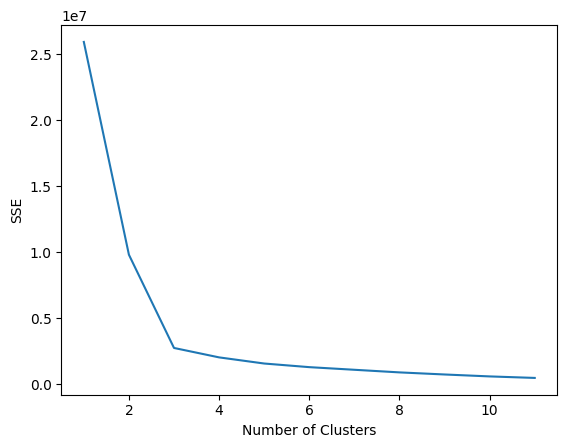

In [179]:
#numClusters = [1,2,3,4,5,6,7,8,9,10,]
SSE = []
for k in krange:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(pca)
    SSE.append(k_means.inertia_)

plt.plot(krange, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

## Escolhendo o valor de K e avaliação do aprendizado de máquina

In [203]:
modelo_1 =  KMeans(n_clusters=8)
modelo_1.fit(pca)

KMeans()

Avaliar a Máquina Preditiva Modelo_01 com K=8

*   Item da lista
*   Item da lista



In [204]:
# Obteremos valores mínimos e máximos para organizar o shape
x_min, x_max = pca[:, 0].min() - 5, pca[:, 0].max() -1
y_min, y_max = pca[:, 1].min() + 1,  pca[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = modelo_1.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

In [205]:
Z

array([[1, 1, 1, ..., 6, 6, 6],
       [1, 1, 1, ..., 6, 6, 6],
       [1, 1, 1, ..., 6, 6, 6],
       ...,
       [4, 4, 4, ..., 2, 2, 2],
       [4, 4, 4, ..., 2, 2, 2],
       [4, 4, 4, ..., 2, 2, 2]], dtype=int32)

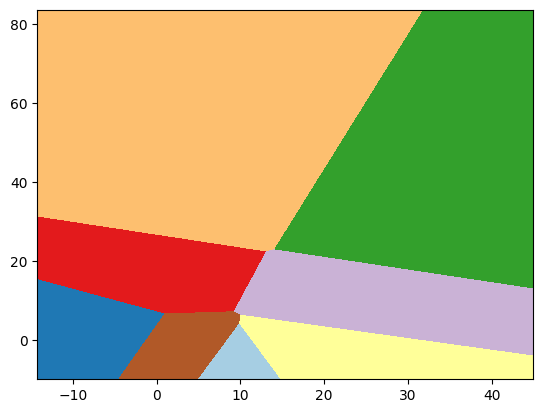

In [206]:
#Plot das áreas dos clusters
plt.figure(1)
plt.clf()
plt.imshow(Z,
           interpolation = 'nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Paired,
           aspect = 'auto', origin='lower')

## Avaliando se é o melhor modelo
Utilizaremos a função silhouette_score para avaliar se estamos utilziando o melhor modelo para o sistema. A função vai calcular a média entre os núcleo dos agrupamentos pacara da amosta, calculando o coeficiênte das labels (Rótulos) de todas as amostras

In [207]:
?silhouette_score

In [209]:
labels = modelo_1.labels_
silhouette_score(pca, labels, metric = 'euclidean')

KeyboardInterrupt: 

In [ ]:
modelo_2 =  KMeans(n_clusters=9)
modelo_2.fit(pca)
labels - modelo_2.labels_
silhouette_score(pca, labels, metric = 'euclidean')

# *Identificação dos Clustes da Máquina virtual*


In [186]:
#Criar uma lista com nome das colunas

nomes = [
         'Potencia_Ativa_Global',
          'Potência_Reativa_Global',
          'Tensao_Voltagem',
          'Intensidade_Global',
          'SubMedicao_1',
          'SubMedicao_2',
          'SubMedicao_3'
        ]


In [215]:
# Incluir o número do cluster na base do clientes
cluster_map = pd.DataFrame(dataset, columns=nomes)
cluster_map['Potencia_Ativa_Global'] = pd.to_numeric(cluster_map['Potencia_Ativa_Global'])
cluster_map['Cluster'] = modelo_2.labels_
cluster_map.tail()

,Potencia_Ativa_Global,Potência_Reativa_Global,Tensao_Voltagem,Intensidade_Global,SubMedicao_1,SubMedicao_2,SubMedicao_3,Cluster
204923,2.194,0.216,240.440,9.000,2.000,2.000,18.0,3
204924,0.240,0.130,239.330,1.000,0.000,0.000,1.0,3
204925,0.174,0.150,240.290,0.800,0.000,0.000,0.0,3
204926,0.318,0.090,242.820,1.400,0.000,0.000,0.0,7
204927,0.126,0.000,236.420,0.600,0.000,0.000,0.0,1


In [216]:
# calculamos a média de energia por grupo
cluster_map.groupby('Cluster')['Potencia_Ativa_Global'].mean()

Cluster
0    1.116247
1    1.086877
2    1.096819
3    1.092019
4    1.094897
5    1.070515
6    1.069201
7    1.093066
8    1.096247
Name: Potencia_Ativa_Global, dtype: float64